In [1]:
!pip install --no-cache-dir tensorflow

In [2]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\administrator\appdata\local\programs\python\python310\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 


In [3]:
# Importer les libraires nécessaires
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#load the dataset
data = load_boston()
#convert the dataset into a Pandas dataframe and add the target column named 'Price'
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
df.head()
# print(df['CHAS'])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#vérifier les valeurs nulles
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
def create_vif(dataframe):
    ''' This function calculates the Variation Inflation Factors for each column and convert it into a dataframe'''
    
    #create an empty dataframe
    vif_table = pd.DataFrame()
    #populate the first column with the columns of the dataset
    vif_table['variables'] = dataframe.columns
    #calculate the VIF of each column and create a VIF column to store the number
    vif_table['VIF'] = [vif(dataframe.values, i) for i in range(df.shape[1])]
    
    return vif_table

#print the VIF table for each variable
print(create_vif(df))


   variables         VIF
0       CRIM    2.131404
1         ZN    2.910004
2      INDUS   14.485874
3       CHAS    1.176266
4        NOX   74.004269
5         RM  136.101743
6        AGE   21.398863
7        DIS   15.430455
8        RAD   15.369980
9        TAX   61.939713
10   PTRATIO   87.227233
11         B   21.351015
12     LSTAT   12.615188
13     Price   24.503206


In [8]:
#compress the columns 'DIS', 'RAD', 'INDUS' into 1 column
pca = PCA(n_components=1)
#call the compressed column 'new'
df['new'] = pca.fit_transform(df[['DIS', 'RAD', 'INDUS']])
#drop the three columns from the dataset
df = df.drop(['DIS', 'RAD', 'INDUS'], axis=1)

In [9]:
#recheck the new VIF table
print(create_vif(df))

   variables         VIF
0       CRIM    2.006392
1         ZN    2.349186
2       CHAS    1.173519
3        NOX   65.166302
4         RM  133.757986
5        AGE   18.823276
6        TAX   56.391909
7    PTRATIO   77.938234
8          B   21.345554
9      LSTAT   12.580803
10     Price   23.131681
11       new    9.194328


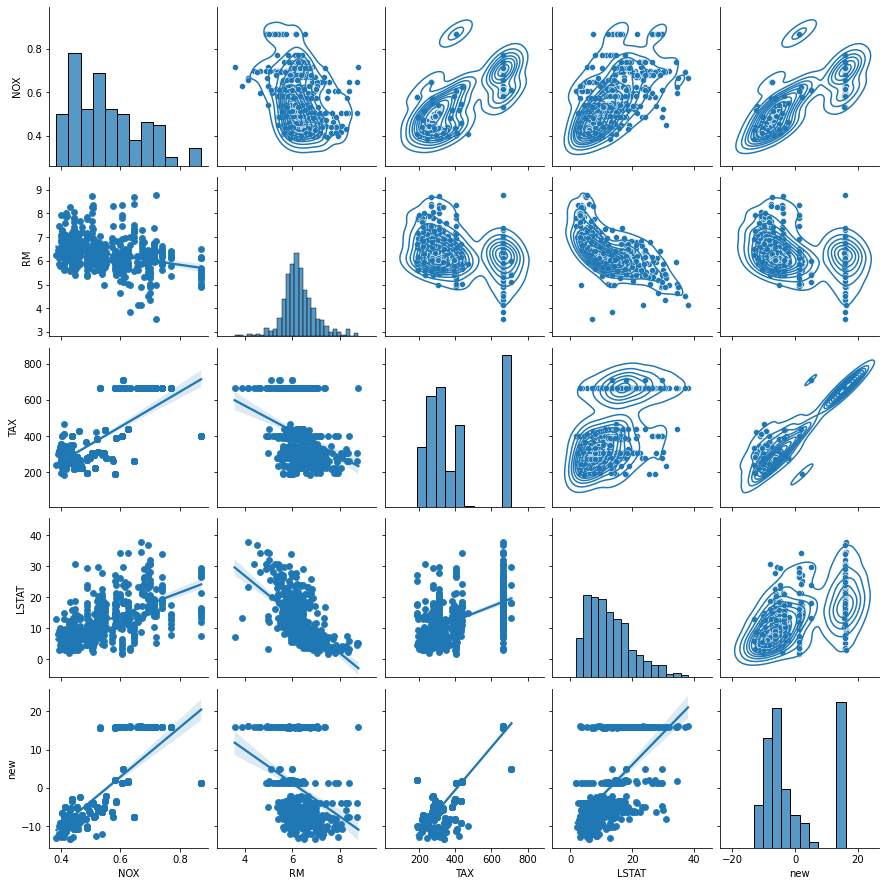

In [10]:
#print a pairplot to check the relationships between strongly correlated features
pp = sns.pairplot(df[['NOX', 'RM', 'TAX', 'LSTAT', 'new']])
pp = pp.map_lower(sns.regplot)
pp = pp.map_upper(sns.kdeplot);

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


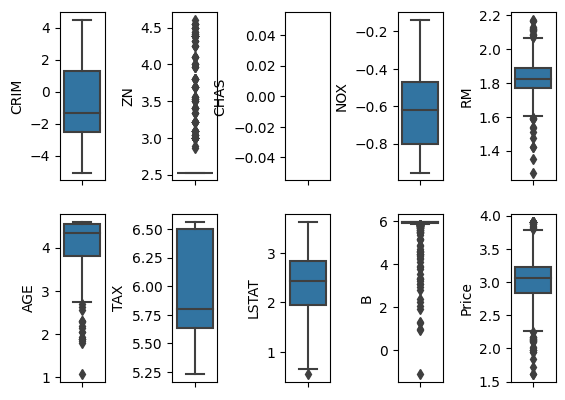

In [11]:
df1 = df.copy()
# # Create a figure with 10 subplots with a width spacing of 1.5    
fig, ax = plt.subplots(2,5)
fig.subplots_adjust(wspace=1.5)

# Create a boxplot for the continuous features      
box_plot1 = sns.boxplot(y=np.log(df1[df1.columns[0]]), ax=ax[0][0])
box_plot2 = sns.boxplot(y=np.log(df1[df1.columns[1]]), ax=ax[0][1])
box_plot3 = sns.boxplot(y=np.log(df1[df1.columns[2]]), ax=ax[0][2])
box_plot4 = sns.boxplot(y=np.log(df1[df1.columns[3]]), ax=ax[0][3])
box_plot5 = sns.boxplot(y=np.log(df1[df1.columns[4]]), ax=ax[0][4])
box_plot6 = sns.boxplot(y=np.log(df1[df1.columns[5]]), ax=ax[1][0])
box_plot7 = sns.boxplot(y=np.log(df1[df1.columns[6]]), ax=ax[1][1])
box_plot8 = sns.boxplot(y=np.log(df1[df1.columns[-3]]), ax=ax[1][2])
box_plot9 = sns.boxplot(y=np.log(df1[df1.columns[8]]), ax=ax[1][3])
box_plot10 = sns.boxplot(y=np.log(df1[df1.columns[10]]), ax=ax[1][4])

In [12]:
#One-Hot Encode the CHAS column
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)
#define the features and the labels, X and y
print(df.shape)
print(df.describe())

X = df.drop(['Price'], axis=1)
y = df['Price']

#split the features and labels into  train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#rescale the data to be robust to outliers
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
data_top = df.head()
data_top

(506, 12)
             CRIM          ZN         NOX          RM         AGE         TAX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636    0.554695    6.284634   68.574901  408.237154   
std      8.601545   23.322453    0.115878    0.702617   28.148861  168.537116   
min      0.006320    0.000000    0.385000    3.561000    2.900000  187.000000   
25%      0.082045    0.000000    0.449000    5.885500   45.025000  279.000000   
50%      0.256510    0.000000    0.538000    6.208500   77.500000  330.000000   
75%      3.677083   12.500000    0.624000    6.623500   94.075000  666.000000   
max     88.976200  100.000000    0.871000    8.780000  100.000000  711.000000   

          PTRATIO           B       LSTAT       Price           new  \
count  506.000000  506.000000  506.000000  506.000000  5.060000e+02   
mean    18.455534  356.674032   12.653063   22.532806  8.987102e-16   
std      2.164946   91.294864    7.141062    9.

,CRIM,ZN,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT,Price,new,CHAS_1.0
0,0.00632,18.0,0.538,6.575,65.2,296.0,15.3,396.90,4.98,24.0,-11.967456,0
1,0.02731,0.0,0.469,6.421,78.9,242.0,17.8,396.90,9.14,21.6,-8.607969,0
2,0.02729,0.0,0.469,7.185,61.1,242.0,17.8,392.83,4.03,34.7,-8.607969,0
3,0.03237,0.0,0.458,6.998,45.8,222.0,18.7,394.63,2.94,33.4,-10.670296,0
4,0.06905,0.0,0.458,7.147,54.2,222.0,18.7,396.90,5.33,36.2,-10.670296,0


In [13]:
#built the neural network architecture
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(1, activation='linear'))

In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [15]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 4s 87ms/step - loss: 553.3685 - mse: 553.3685 - mae: 21.5696 - val_loss: 530.5992 - val_mse: 530.5992 - val_mae: 20.9455
Epoch 2/200
11/11 [==============================] - 0s 15ms/step - loss: 547.1377 - mse: 547.1377 - mae: 21.4012 - val_loss: 525.1493 - val_mse: 525.1493 - val_mae: 20.8123
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 541.0032 - mse: 541.0032 - mae: 21.2358 - val_loss: 519.7263 - val_mse: 519.7263 - val_mae: 20.6888
Epoch 4/200
11/11 [==============================] - 0s 18ms/step - loss: 534.7947 - mse: 534.7947 - mae: 21.0744 - val_loss: 513.9958 - val_mse: 513.9958 - val_mae: 20.5597
Epoch 5/200
11/11 [==============================] - 0s 19ms/step - loss: 528.1902 - mse: 528.1902 - mae: 20.9072 - val_loss: 508.0096 - val_mse: 508.0096 - val_mae: 20.4249
Epoch 6/200
11/11 [==============================] - 0s 20ms/step - loss: 521.6048 - mse: 521.6048 - mae: 20.7399 - val_loss: 501.

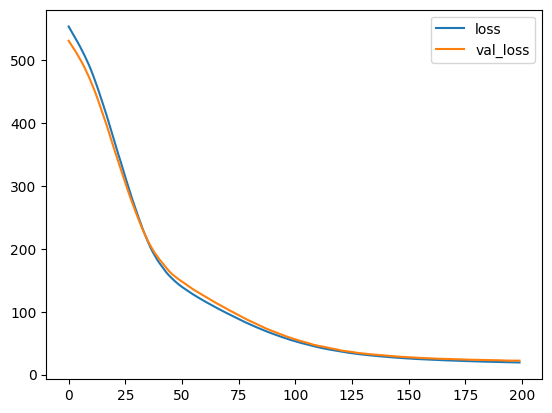

In [16]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [17]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 64ms/step - loss: 18.8736 - mse: 18.8736 - mae: 3.1703


[18.873632431030273, 18.873632431030273, 3.1702892780303955]

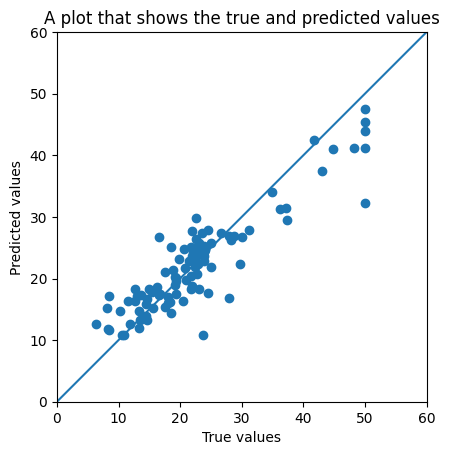

In [18]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])

In [19]:
#built the neural network architecture
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 2s 45ms/step - loss: 583.5263 - mse: 583.5263 - mae: 22.4152 - val_loss: 558.4146 - val_mse: 558.4146 - val_mae: 21.6422
Epoch 2/200
11/11 [==============================] - 0s 13ms/step - loss: 578.0939 - mse: 578.0939 - mae: 22.2874 - val_loss: 552.9775 - val_mse: 552.9775 - val_mae: 21.5062
Epoch 3/200
11/11 [==============================] - 0s 13ms/step - loss: 571.6871 - mse: 571.6871 - mae: 22.1332 - val_loss: 546.3119 - val_mse: 546.3119 - val_mae: 21.3375
Epoch 4/200
11/11 [==============================] - 0s 15ms/step - loss: 563.7122 - mse: 563.7122 - mae: 21.9376 - val_loss: 538.3669 - val_mse: 538.3669 - val_mae: 21.1605
Epoch 5/200
11/11 [==============================] - 0s 13ms/step - loss: 553.9104 - mse: 553.9104 - mae: 21.7050 - val_loss: 528.6339 - val_mse: 528.6339 - val_mae: 20.9490
Epoch 6/200
11/11 [==============================] - 0s 14ms/step - loss: 542.6159 - mse: 542.6159 - mae: 21.4245 - val_loss: 516.

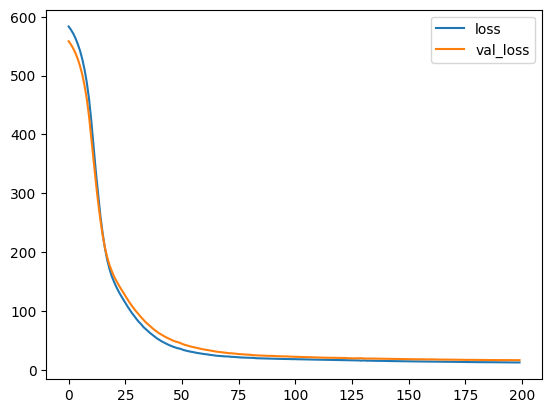

In [20]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [21]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 60ms/step - loss: 12.5573 - mse: 12.5573 - mae: 2.6802


[12.557293891906738, 12.557293891906738, 2.6801719665527344]

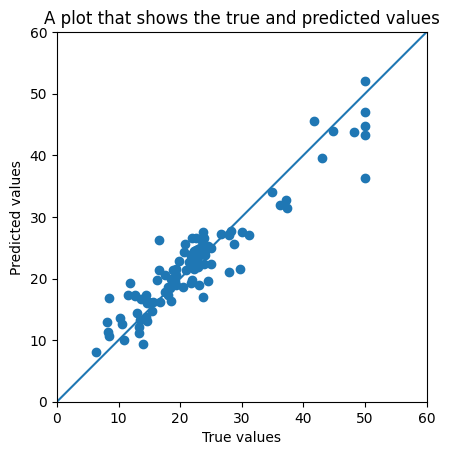

In [22]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])